# Машинное обучение, ФКН ВШЭ

# Семинар 1


# Знакомство с jupyter

Документ jupyter notebook имеет расширение .ipynb, состоит из множества ячеек. В ячейках можно писать программный код, делать размеченные и неразмеченные заметки. Этим функциям соответствует три типа ячеек:
    
    1. code
    2. markdown
    3. raw

Для работы с содержимым ячейки используется *режим редактирования* (*Edit mode*, включается нажатием клавиши **Enter** после выбора ячейки), а для навигации между ячейками искользуется *командный режим* (*Command mode*, включается нажатием клавиши **Esc**). 

Тип ячейки можно задать в командном режиме либо с помощью горячих клавиш (**y** to code, **m** to markdown, **r** to edit raw text), либо в меню *Cell -> Cell type*. 

In [1]:
# Ячейка с кодом
a = 1

## Ячейка с размеченным текстом

После заполнения ячейки нужно нажать *Shift + Enter*, эта команда обработает содержимое ячейки: проинтерпретирует код или сверстает размеченный текст.

Ячейки с программным кодом разделяют область видимости:

In [2]:
a = 1

In [3]:
print(a)

1


# Пара слов о вёрстке 
[Здесь](https://athena.brynmawr.edu/jupyter/hub/dblank/public/Jupyter%20Notebook%20Users%20Manual.ipynb) находится <s>не</s>большая заметка о используемом языке разметки Markdown. Он позволяет:

0. Составлять упорядоченные списки
1. #Делать 
##заголовки 
###разного уровня
3. Выделять *текст* <s>при</s> **необходимости**
4. Добавлять [ссылки](http://imgs.xkcd.com/comics/the_universal_label.png)


* Составлять неупорядоченные списки

Делать вставки с помощью LaTex:
    
$
\left\{
\begin{array}{ll}
x = 16 \sin^3 (t) \\ 
y = 13 \cos (t) - 5 \cos (2t) - 2 \cos (3t) - \cos (4t) \\
t \in [0, 2 \pi]
\end{array}
\right.$

Можно также вставлять изображения:
![](images/cat.jpg)

# NumPy

**NumPy** — библиотека языка Python, позволяющая [удобно] работать с многомерными массивами и матрицами, содержащая математические функции. Кроме того, NumPy позволяет векторизовать многие вычисления, имеющие место в машинном обучении. 

 - [numpy](http://www.numpy.org)
 - [numpy tutorial](http://cs231n.github.io/python-numpy-tutorial/)
 - [100 numpy exercises](http://www.labri.fr/perso/nrougier/teaching/numpy.100/)

In [4]:
import numpy as np

Основным типом данных NumPy является многомерный массив элементов одного типа — [numpy.ndarray](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.array.html). Каждый подобный массив имеет несколько *измерений* или *осей* — в частности, вектор (в классическом понимании) является одномерным массивом и имеет 1 ось, матрица является двумерным массивом и имеет 2 оси и т.д.

In [5]:
vec = np.array([1, 2, 3])
vec.ndim # количество осей

1

In [6]:
mat = np.array([[1, 2, 3], [4, 5, 6]])
mat.ndim

2

Чтобы узнать длину массива по каждой из осей, можно воспользоваться атрибутом shape:

In [7]:
vec.shape

(3,)

Чтобы узнать тип элементов и их размер в байтах:

In [8]:
mat.dtype.name

'int64'

In [9]:
mat.itemsize

8

## Создание массивов

* Передать итерируемый объект в качестве параметра функции array (можно также явно указать тип элементов):

In [10]:
A = np.array([1, 2, 3])
A

array([1, 2, 3])

In [11]:
A = np.array([1, 2, 3], dtype = float)
A

array([ 1.,  2.,  3.])

In [12]:
B = np.array([(1, 2, 3), (4, 5, 6)])
B

array([[1, 2, 3],
       [4, 5, 6]])

* Создание массивов специального вида при помощи функций zeros, ones, empty, identity:

In [13]:
np.zeros((3,))

array([ 0.,  0.,  0.])

In [14]:
np.ones((3, 4))

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

In [15]:
np.identity(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [16]:
np.empty((2, 5))

array([[  1.72723371e-077,  -4.33125706e-311,   2.14321575e-312,
          8.48798317e-313,   1.08221785e-312],
       [  6.79038653e-313,   8.70018275e-313,   2.12199581e-314,
          2.18655314e-314,   6.95337767e-309]])

Обратите внимание, что содержимое массива, созданного при помощи функции empty, **не инициализируется**, то есть в качестве значений он **может содержать "мусор"**.

* Создание последовательностей при помощи функций arange (в качестве парметров принимает левую и правую границы последовательности и **шаг**) и linspace (принимает левую и правую границы и **количество элементов**):

In [17]:
np.arange(2, 20, 3) # аналогично стандартной функции range python, правая граница не включается

array([ 2,  5,  8, 11, 14, 17])

In [18]:
np.arange(2.5, 8.7, 0.9) # но может работать и с вещественными числами

array([ 2.5,  3.4,  4.3,  5.2,  6.1,  7. ,  7.9])

In [19]:
np.linspace(2, 18, 14) # правая граница включается (по умолчанию)

array([  2.        ,   3.23076923,   4.46153846,   5.69230769,
         6.92307692,   8.15384615,   9.38461538,  10.61538462,
        11.84615385,  13.07692308,  14.30769231,  15.53846154,
        16.76923077,  18.        ])

* Для изменения размеров существующего массива можно воспользоваться функцией reshape (при этом количество элементов должно оставаться неизменным):

In [20]:
np.arange(9).reshape(3, 3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

Вместо значения длины массива по одному из измерений можно указать -1 — в этом случае значение будет рассчитано автоматически:

In [21]:
np.arange(8).reshape(2, -1)

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

* Транспонирование существующего массива:

In [22]:
C = np.arange(6).reshape(2, -1)
C

array([[0, 1, 2],
       [3, 4, 5]])

In [23]:
C.T

array([[0, 3],
       [1, 4],
       [2, 5]])

* Объединение существующих массивов по заданной оси:

In [24]:
A = np.arange(6).reshape(2, -1)
np.hstack((A, A**2))

array([[ 0,  1,  2,  0,  1,  4],
       [ 3,  4,  5,  9, 16, 25]])

In [25]:
np.vstack((A, A**2))

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 0,  1,  4],
       [ 9, 16, 25]])

In [26]:
np.concatenate((A, A**2), axis = 1)

array([[ 0,  1,  2,  0,  1,  4],
       [ 3,  4,  5,  9, 16, 25]])

* Повторение существующего массива

In [27]:
a = np.arange(3)
np.tile(a, (2, 2))

array([[0, 1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1, 2]])

In [28]:
np.tile(a, (4, 1))

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       [0, 1, 2]])

## Базовые операции

* Базовые арифметические операции над массивами выполняются поэлементно:

In [29]:
A = np.arange(9).reshape(3, 3)
B = np.arange(1, 10).reshape(3, 3)

In [30]:
print(A)
print(B)

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [31]:
A + B

array([[ 1,  3,  5],
       [ 7,  9, 11],
       [13, 15, 17]])

In [32]:
A * 1.0 / B

array([[ 0.        ,  0.5       ,  0.66666667],
       [ 0.75      ,  0.8       ,  0.83333333],
       [ 0.85714286,  0.875     ,  0.88888889]])

In [33]:
A + 1

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [34]:
3 * A

array([[ 0,  3,  6],
       [ 9, 12, 15],
       [18, 21, 24]])

In [35]:
A ** 2

array([[ 0,  1,  4],
       [ 9, 16, 25],
       [36, 49, 64]])

Отдельно обратим внимание на то, что умножение массивов также является **поэлементным**, а не матричным:

In [36]:
A * B

array([[ 0,  2,  6],
       [12, 20, 30],
       [42, 56, 72]])

Для выполнения матричного умножения необходимо использовать функцию dot:

In [37]:
A.dot(B)

array([[ 18,  21,  24],
       [ 54,  66,  78],
       [ 90, 111, 132]])

Поскольку операции выполняются поэлементно, операнды бинарных операций должны иметь одинаковый размер. Тем не менее, операция может быть корректно выполнена, если размеры операндов таковы, что они могут быть расширены до одинаковых размеров. Данная возможность называется [broadcasting](http://www.scipy-lectures.org/intro/numpy/operations.html#broadcasting):
![](images/numpy_broadcasting.png)

In [38]:
np.tile(np.arange(0, 40, 10), (3, 1)).T + np.array([0, 1, 2])

array([[ 0,  1,  2],
       [10, 11, 12],
       [20, 21, 22],
       [30, 31, 32]])

* Универсальные функции (sin, cos, exp и т.д.) также применяются поэлементно:

In [39]:
np.exp(A)

array([[  1.00000000e+00,   2.71828183e+00,   7.38905610e+00],
       [  2.00855369e+01,   5.45981500e+01,   1.48413159e+02],
       [  4.03428793e+02,   1.09663316e+03,   2.98095799e+03]])

* Некоторые операции над массивами (например, вычисления минимума, максимума, суммы элементов) выполняются над всеми элементами вне зависимости от формы массива, однако при указании оси выполняются вдоль нее (например, для нахождения максимума каждой строки или каждого столбца):

In [40]:
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [41]:
A.min()

0

In [42]:
A.max(axis = 0)

array([6, 7, 8])

In [43]:
A.sum(axis = 1)

array([ 3, 12, 21])

## Индексация

Для доступа к элементам может использоваться [много различных способов](http://docs.scipy.org/doc/numpy/reference/arrays.indexing.html), рассмотрим основные.

* Для индексации могут использоваться конкретные значения индексов и срезы (slice), как и в стандартных типах Python. Для многомерных массивов индексы для различных осей разделяются запятой. Если для многомерного массива указаны индексы не для всех измерений, недостающие заполняются полным срезом (:).

In [44]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [45]:
a[2:5]

array([2, 3, 4])

In [46]:
a[3:8:2]

array([3, 5, 7])

In [47]:
A = np.arange(81).reshape(9, -1)
A

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49, 50, 51, 52, 53],
       [54, 55, 56, 57, 58, 59, 60, 61, 62],
       [63, 64, 65, 66, 67, 68, 69, 70, 71],
       [72, 73, 74, 75, 76, 77, 78, 79, 80]])

In [48]:
A[2:4]

array([[18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35]])

In [49]:
A[:, 2:4]

array([[ 2,  3],
       [11, 12],
       [20, 21],
       [29, 30],
       [38, 39],
       [47, 48],
       [56, 57],
       [65, 66],
       [74, 75]])

In [50]:
A[2:4, 2:4]

array([[20, 21],
       [29, 30]])

In [51]:
A[-1]

array([72, 73, 74, 75, 76, 77, 78, 79, 80])

* Также может использоваться индексация при помощи списков индексов (по каждой из осей):

In [52]:
A = np.arange(81).reshape(9, -1)
A

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23, 24, 25, 26],
       [27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44],
       [45, 46, 47, 48, 49, 50, 51, 52, 53],
       [54, 55, 56, 57, 58, 59, 60, 61, 62],
       [63, 64, 65, 66, 67, 68, 69, 70, 71],
       [72, 73, 74, 75, 76, 77, 78, 79, 80]])

In [53]:
A[[2, 4, 5], [0, 1, 3]]

array([18, 37, 48])

* Может также применяться логическая индексация (при помощи логических массивов):

In [54]:
A = np.arange(11)
A

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [55]:
A[A % 5 != 3]

array([ 0,  1,  2,  4,  5,  6,  7,  9, 10])

In [56]:
A[np.logical_and(A != 7, A % 5 != 3)] # также можно использовать логические операции

array([ 0,  1,  2,  4,  5,  6,  9, 10])

## Примеры

In [57]:
A = np.arange(120).reshape(10, -1)
A

array([[  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11],
       [ 12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23],
       [ 24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35],
       [ 36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47],
       [ 48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59],
       [ 60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71],
       [ 72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83],
       [ 84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95],
       [ 96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107],
       [108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119]])

1. Выбрать все четные строки матрицы A.
2. Составить одномерный массив из всех не делящихся на 3 элементов нечетных столбцов А.
3. Посчитать сумму диагональных элементов A.

In [58]:
# Your code here

## Зачем?

Зачем необходимо использовать NumPy, если существуют стандартные списки/кортежи и циклы?

Причина заключается в скорости работы. Попробуем посчитать сумму поэлементых произведений 2 больших векторов:

In [59]:
import time

A_quick_arr = np.random.normal(size = (1000000,))
B_quick_arr = np.random.normal(size = (1000000,))

A_slow_list, B_slow_list = list(A_quick_arr), list(B_quick_arr)

In [60]:
start = time.clock()
ans = 0
for i in range(len(A_slow_list)):
    ans += A_slow_list[i] * B_slow_list[i]
print(time.clock() - start) # время выполнения в секундах

0.5221209999999998


In [61]:
start = time.clock()
ans = sum([A_slow_list[i] * B_slow_list[i] for i in range(1000000)])
print(time.clock() - start)

0.4124240000000001


In [62]:
start = time.clock()
ans = np.sum(A_quick_arr * B_quick_arr)
print(time.clock() - start)

0.016610000000000014


In [63]:
start = time.clock()
ans = A_quick_arr.dot(B_quick_arr)
print(time.clock() - start)

0.006097000000000019


# Pandas

In [64]:
import os
import pandas as pd
%matplotlib inline

**Pandas** (Python Data Analysis Library) — библиотека языка Python для [удобных] обработки и анализа данных.


Рассмотрим данную библиотеку на примере [данных](https://www.kaggle.com/c/titanic/data) [соревнования](https://www.kaggle.com/c/titanic) о предсказании судьбы пассажиров лайнера "Титаник". Имеется некоторая информация о пассажирах, по которой необходимо предсказать выживаемость каждого из них.
* Какого типа данная задача?
* Что является объектами?
* Что является ответами?
* Какие могут быть признаки? Какие у них типы?

Скачаем данные:

In [65]:
if not os.path.exists('data/titanic.csv'):
    if not os.path.exists('data'):
        os.makedirs('data')
    os.system('wget -O data/titanic.csv https://www.dropbox.com/s/e8q2ez4t97v0ue5/titanic.csv?dl=1')

Загрузка данных в **pandas** происходит в специальный объект типа **DataFrame**:

In [66]:
pass_data = pd.read_csv('data/titanic.csv')

Данные представляют из себя таблицу, где строка — объект, столбец — признак. Для экономии места можно выводить заданное количество первых строк объекта при помощи метода head():

In [67]:
pass_data.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Посмотрим на признаки:

In [68]:
pass_data.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

По данным можно индексироваться при помощи номеров строк/столбцов или названий признаков:

In [69]:
pass_data[2:5]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.55,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.55,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [70]:
pass_data.iloc[1:5, 1:3]

,survived,name
1,1,"Allison, Master. Hudson Trevor"
2,0,"Allison, Miss. Helen Loraine"
3,0,"Allison, Mr. Hudson Joshua Creighton"
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)"


In [71]:
pass_data['name'].head()

0                      Allen, Miss. Elisabeth Walton
1                     Allison, Master. Hudson Trevor
2                       Allison, Miss. Helen Loraine
3               Allison, Mr. Hudson Joshua Creighton
4    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
Name: name, dtype: object

In [72]:
pass_data[['name', 'sex', 'parch']].head()

,name,sex,parch
0,"Allen, Miss. Elisabeth Walton",female,0
1,"Allison, Master. Hudson Trevor",male,2
2,"Allison, Miss. Helen Loraine",female,2
3,"Allison, Mr. Hudson Joshua Creighton",male,2
4,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,2


Также действует и логическая индексация, которая позволяет рассматривать определенные группы объектов:

In [73]:
pass_data[pass_data['sex'] == 'female'].head() # женщины на борту

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"


In [74]:
# женщины старше 60 и мужчины на борту
pass_data[(pass_data['sex'] == 'female') & (pass_data['age'] >= 60) | (pass_data['sex'] == 'male')].head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"


#### Пример
Посмотрим, сколько на борту было относительно молодых женщин, путешествующих в одиночку. Скорее всего, довольно мало, потому что в такое длительное путешествие молодых девушек одних не отпустили бы опекающие родственники.

In [75]:
pass_data[(pass_data.sex == 'female') & 
          (pass_data.age > 18) & 
          (pass_data.age < 25) & 
          (pass_data.sibsp == 0) &
          (pass_data.parch == 0)].shape

(41, 14)

Кроме того, для заданного признака можно построить гистограмму:

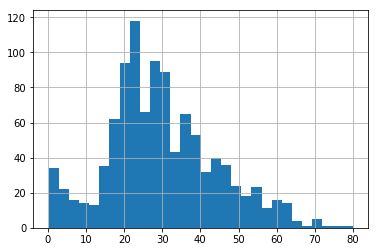

In [76]:
pass_data.age.hist(bins = 30)

## Редактирование DataFrame

* Переименование признаков

In [77]:
pass_data.rename(columns={'sex': 'Sex'}, inplace=True)
pass_data.head()

,pclass,survived,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


* Применение преобразования к существующему признаку. Например, выделим фамилию:

In [78]:
def get_last_name(name):
    return name.split(',')[0].strip()

last_names = pass_data['name'].apply(get_last_name)
last_names.head()

0      Allen
1    Allison
2    Allison
3    Allison
4    Allison
Name: name, dtype: object

* Добавление признака

In [79]:
pass_data['Last_name'] = last_names
pass_data.head()

,pclass,survived,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Last_name
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Allen
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Allison
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Allison
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Allison


* Удаление признака

In [80]:
pass_data.drop('Last_name', axis=1, inplace=True)
pass_data.head()

,pclass,survived,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


* Работа с пропущенными данными

Методы isnull() и notnull() позволяют получить бинарный массив, отражающий отсутствие или наличие данных для каждого из объектов соответственно:

In [81]:
pass_data['boat'].isnull().head()

0    False
1    False
2     True
3     True
4     True
Name: boat, dtype: bool

In [82]:
pass_data[pass_data['boat'].notnull()].head() # пассажиры с известным номером шлюпки эвакуации

,pclass,survived,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"


* Сортировка объектов/признаков

In [83]:
pass_data.sort_values(by=['pclass', 'fare'], ascending=True).head()

,pclass,survived,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S,NaN,NaN,"Belfast, NI"
70,1,0,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0,NaN,S,NaN,NaN,"Liverpool, England / Belfast"
125,1,0,"Fry, Mr. Richard",male,NaN,0,0,112058,0.0,B102,S,NaN,NaN,NaN
150,1,0,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,NaN,110.0,NaN
170,1,1,"Ismay, Mr. Joseph Bruce",male,49.0,0,0,112058,0.0,B52 B54 B56,S,C,NaN,Liverpool


In [84]:
pass_data.sort_values(by=['pclass', 'fare'], ascending=[True, False]).head()

,pclass,survived,name,Sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA"
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA"
183,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,3,NaN,NaN
302,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,3,NaN,NaN
111,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,10,NaN,"Winnipeg, MB"


## Группировка данных

Группировка при помощи метода groupby позволяет объединять данные в группы по одному или нескольким признакам и считать по ним общую статистику.

In [85]:
pass_data.groupby('Sex') # разбиение всех объектов на 2 группы по полу

In [86]:
pass_data.groupby('Sex')['pclass'].value_counts()

Sex     pclass
female  3         216
        1         144
        2         106
male    3         493
        1         179
        2         171
Name: pclass, dtype: int64

In [87]:
pass_data.groupby('pclass')['fare'].describe()

,count,mean,std,min,25%,50%,75%,max
pclass,,,,,,,,
1,323.0,87.508992,80.447178,0.0,30.6958,60.0000,107.6625,512.3292
2,277.0,21.179196,13.607122,0.0,13.0000,15.0458,26.0000,73.5000
3,708.0,13.302889,11.494358,0.0,7.7500,8.0500,15.2458,69.5500


In [88]:
pass_data.groupby('Sex')['age'].mean() # средний возраст для пассажиров каждого из полов

Sex
female    28.687088
male      30.585228
Name: age, dtype: float64

Как известно, в первую очередь спасали женщин и детей в порядке повышения номера класса, в связи с этим доля выживших женщин, вероятно, будет выше, чем доля выживших мужчин. Проверим:

In [89]:
pass_data.groupby('Sex')['survived'].mean()

Sex
female    0.727468
male      0.190985
Name: survived, dtype: float64

Аналогично для пассажиров различных классов:

In [90]:
pass_data.groupby('pclass')['survived'].mean()

pclass
1    0.619195
2    0.429603
3    0.255289
Name: survived, dtype: float64

Рассмотренные выше статистические данные могут быть рассмотрены и в виде стандартного DataFrame:

In [91]:
pass_data.groupby('Sex', as_index=False)['survived'].mean()

,Sex,survived
0,female,0.727468
1,male,0.190985


## Сохранение данных

Также данные можно сохранить в файл:

In [92]:
pass_data.to_csv('titanic_2.csv', index=False)

# Matplotlib

* [matplotlib](http://matplotlib.org)
* [matplotlib - 2D and 3D plotting in Python](http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb)
* [visualization in pandas](http://pandas.pydata.org/pandas-docs/stable/visualization.html)

**Matplotlib** — библиотека языка Python, используемая для визуализации.

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt

In [94]:
x = np.linspace(1, 10, 20)

Для построения графиков в matplotlib используются фигуры и заданные для них оси, что довольно удобно в случае, когда необходимо строить несколько графиков или их расположение нестандартное.

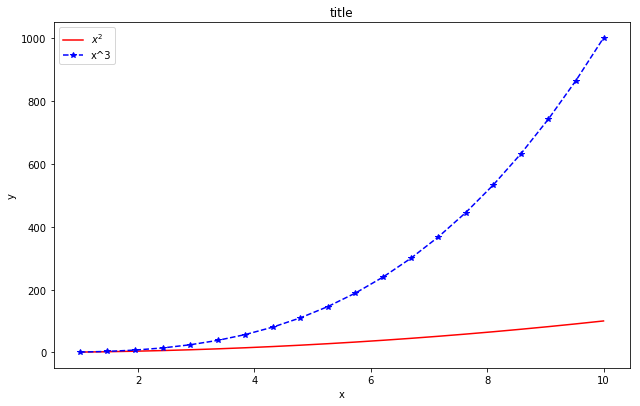

In [95]:
fig = plt.figure(figsize=(10, 6))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(x, x ** 2, 'r')
axes.plot(x, x ** 3, 'b*--')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')
axes.legend([r'$x^2$', 'x^3'], loc = 0)

plt.show()

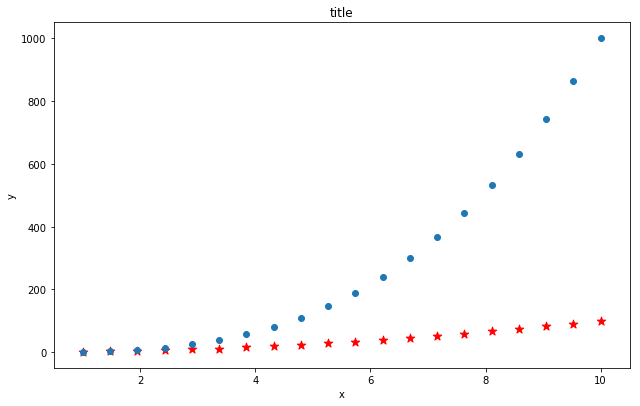

In [96]:
fig = plt.figure(figsize=(10, 6))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.scatter(x, x ** 2, color='red', marker='*', s=80)
axes.scatter(x, x ** 3)

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

plt.show()

Matplotlib позволяет настраивать многие детали создаваемых графиков:

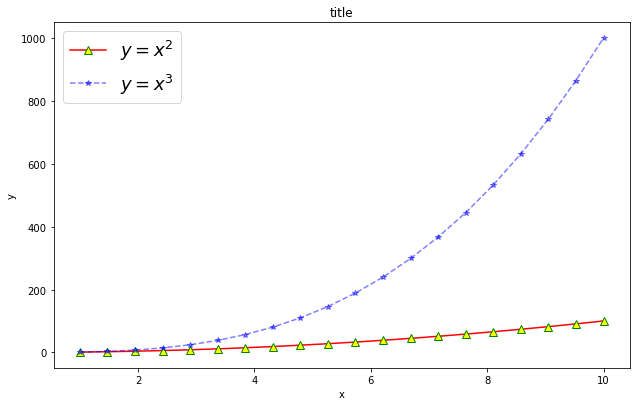

In [97]:
fig = plt.figure(figsize=(10, 6))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(x, x ** 2, 'r^-', label = r'$y = x^2$', markersize=8, markerfacecolor="yellow", 
          markeredgewidth=1, markeredgecolor="green")
axes.plot(x, x ** 3, 'b*--', label = r'$y = x^3$', alpha = 0.5)

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')
axes.legend(loc = 0, fontsize = 18)

plt.show()

Как было упомянуто, matplotlib предоставляет определенную свободу в расположении подграфиков:

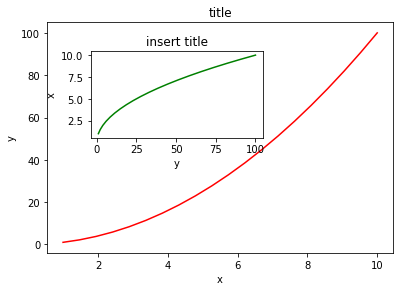

In [98]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(x, x ** 2, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.plot(x ** 2, x, 'g')
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('insert title')

plt.show()

Впрочем, можно использовать и одну из классических конфигураций:

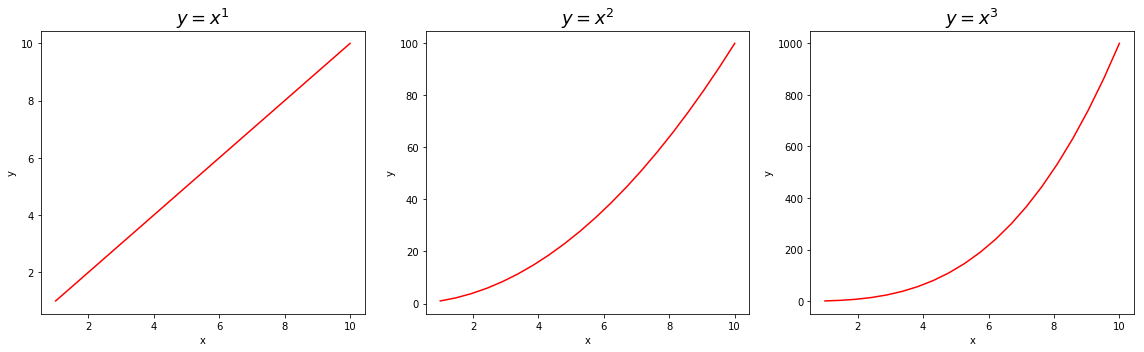

In [99]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (16, 5))

for pow_num, ax in enumerate(axes):
    ax.plot(x, x ** (pow_num + 1), 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(r'$y = x^' + str(pow_num + 1)+ r'$', fontsize = 18)
fig.tight_layout() # борьба с пересечением подграфиков

Получившийся график можно сохранить в файл:

In [100]:
fig.savefig("pows.png", dpi=200)

Matplotlib также позволяет строить surface plot, используя значения функции в узлах сетки:

In [101]:
alpha = 0.7
phi_ext = 2 * np.pi * 0.5

def flux_qubit_potential(phi_m, phi_p):
    return 2 + alpha - 2 * np.cos(phi_p) * np.cos(phi_m) - alpha * np.cos(phi_ext - 2*phi_p)

phi_m = np.linspace(0, 2*np.pi, 100)
phi_p = np.linspace(0, 2*np.pi, 100)
X,Y = np.meshgrid(phi_p, phi_m)
Z = flux_qubit_potential(X, Y).T

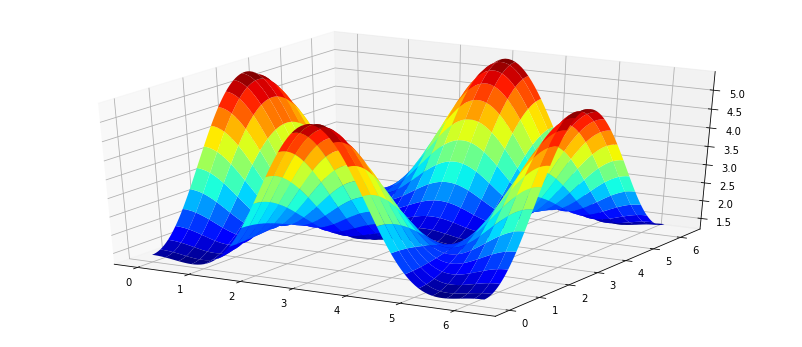

In [102]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14,6))

ax = fig.add_subplot(111, projection='3d')

p = ax.plot_surface(X, Y, Z, rstride=4, cstride=4, linewidth=0, cmap='jet')

Кроме того, можно строить более детализированные гистограммы по сравнению с теми, что мы рассмотрели ранее:

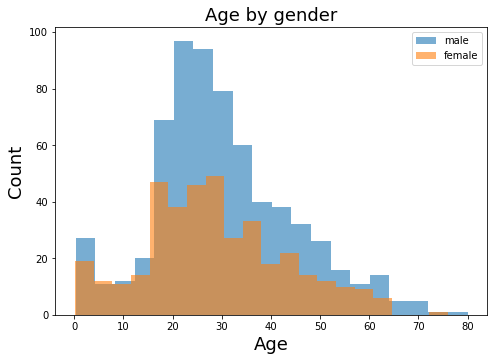

In [103]:
fig = plt.figure()
axes = fig.add_axes([0.0, 0.0, 1.0, 1.0])
bins = 20
index = np.arange(bins)
axes.hist(pass_data[pass_data['Sex'] == 'male']['age'].dropna(), bins=bins, alpha=0.6, label='male')
axes.hist(pass_data[pass_data['Sex'] == 'female']['age'].dropna(), bins=bins, alpha=0.6, label='female')

axes.legend()
axes.set_xlabel('Age', fontsize=18)
axes.set_ylabel('Count', fontsize=18)
axes.set_title('Age by gender', fontsize=18)

plt.show()

Заметим также, что Matplotlib позволяет использовать многие другие типы визуализации, подробнее про них можно почитать, например, [здесь](http://matplotlib.org/gallery.html) или [здесь](http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb).